In [1]:
from __future__  import print_function, division
import pylab as pl #used for plotting
import pandas as pd #used for statistics 
import numpy as np #used for mathematical computation
import os 

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016') #checking to see that environmental variable exists

'/home/cusp/mal824/PUI2016'

### Experiment Setup

#### Significance level = 0.05 

#### Null Hypothesis = $H$0: A normal and logistic distribution does not fit the age distribution of city bike riders

#### Alternate Hypothesis = $H$A: A normal and logistic distribution does fit the age distribution of city bike riders

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip' #unzipping trip data csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  29.0M      0 --:--:-- --:--:-- --:--:-- 37.0M


In [4]:
cb_data = pd.read_csv('201512-citibike-tripdata.zip')

In [5]:
cb_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [6]:
cb_data.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [7]:
cb_data.head()

,birth year
0,1983.0
1,1975.0
2,1966.0
3,1985.0
4,1968.0


In [38]:
cb_data_1 = cb_data['birth year'] > 1940
cb_data[cb_data_1].dropna().values

array([[ 1983.],
       [ 1975.],
       [ 1966.],
       ..., 
       [ 1959.],
       [ 1987.],
       [ 1968.]])

In [43]:
cb_data_age = (2016 - cb_data[cb_data_1].dropna().values).flatten()
cb_data_age

array([ 33.,  41.,  50., ...,  57.,  29.,  48.])

In [44]:
cb_data_age_mean = np.mean(cb_data_age)
cb_data_age_mean

39.629342137135737

In [45]:
cb_data_age_std = np.std(cb_data_age)
cb_data_age_std

11.628533412808174

### Conducting K-test and Anderson test with normal and logistic distributions

In [46]:
import scipy.stats

In [13]:
scipy.stats.kstest(cb_data_age, 'norm', args = (cb_data_age_mean, cb_data_age_std))

KstestResult(statistic=0.10008430090417741, pvalue=0.0)

#### We reject the null hypothesis since the pvalue is 0 in favor of the alternate hypothesis

In [14]:
scipy.stats.anderson(cb_data_age, dist='norm')

AndersonResult(statistic=9281.4353490892099, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### We picked a sigificance level of 5 which corresponds to a critical value of 0.787. Since 0.787 is less than A2 of 9282.8116, we reject $H$0

In [15]:
scipy.stats.kstest(cb_data_age, 'logistic', args = (cb_data_age_mean, cb_data_age_std))

KstestResult(statistic=0.17094267391665235, pvalue=0.0)

#### We reject the $H$0 because the pvalue is zero

In [18]:
scipy.stats.anderson(cb_data_age, dist='logistic')

AndersonResult(statistic=9170.8358048273949, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

#### We reject $H$0 because the critical value at significance level 5 is much less than the A2 statistic of 9147

In [23]:
from collections import Counter 
Counter(cb_data_age)

Counter({17.0: 733,
         18.0: 1725,
         19.0: 1802,
         20.0: 3532,
         21.0: 3842,
         22.0: 5967,
         23.0: 8781,
         24.0: 13348,
         25.0: 19097,
         26.0: 23819,
         27.0: 25958,
         28.0: 26664,
         29.0: 26811,
         30.0: 27495,
         31.0: 29271,
         32.0: 29441,
         33.0: 28170,
         34.0: 26069,
         35.0: 24742,
         36.0: 22637,
         37.0: 19529,
         38.0: 19693,
         39.0: 18730,
         40.0: 17925,
         41.0: 16605,
         42.0: 17609,
         43.0: 15460,
         44.0: 16046,
         45.0: 17167,
         46.0: 19463,
         47.0: 16230,
         48.0: 14325,
         49.0: 14268,
         50.0: 12750,
         51.0: 13378,
         52.0: 13572,
         53.0: 12592,
         54.0: 12373,
         55.0: 11053,
         56.0: 12071,
         57.0: 10279,
         58.0: 9325,
         59.0: 8425,
         60.0: 7331,
         61.0: 6613,
         62.0: 6399,
 

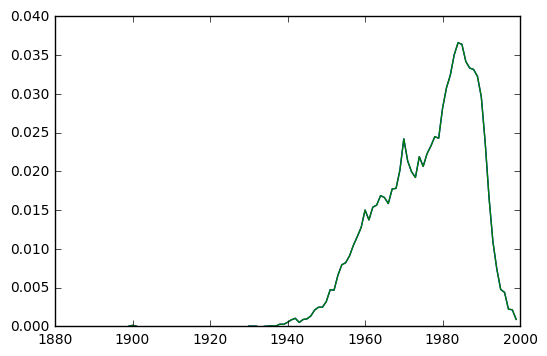

In [57]:
dataframe = pd.DataFrame(Counter(cb_data['birth year']), index = ('birth year', 'number')).T
percentage = dataframe / len(cb_data['birth year'])

pl.plot(percentage)

In [26]:
from scipy.stats import norm

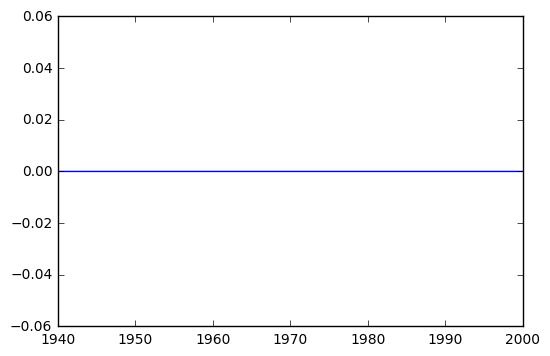

In [54]:
x = np.linspace(1940,2000,30000)
y = norm.pdf(x, loc = cb_data_age_mean, scale = cb_data_age_std)
pl.plot(x,y)

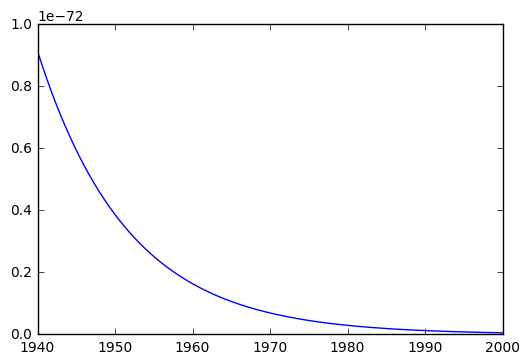

In [55]:
from scipy.stats import logistic
x1 = np.linspace(1940,2000,30000)
y1 = logistic.pdf(x1, loc = cb_data_age_mean, scale = cb_data_age_std)
pl.plot(x1, y1)

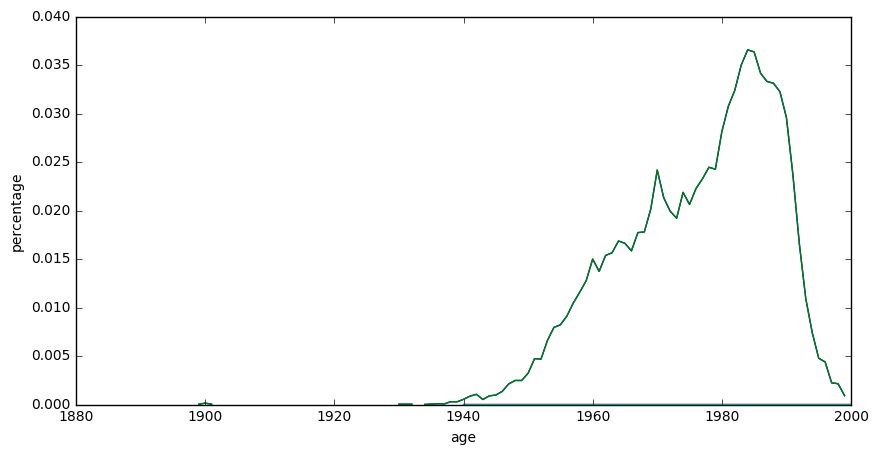

In [59]:
pl.figure(figsize=(10,5))
pl.plot(percentage)
pl.plot(x,y)
pl.plot(x1,y1)
pl.xlabel('age')
pl.ylabel('percentage')